# 1. Importing all the necessary modules for our project

In [834]:
#import modules
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from data_understanding import data_summary
import warnings
warnings.filterwarnings("ignore")

### 1.1 checking our data

In [835]:
path = "Test_set_values.csv"
Target_summary = data_summary(path)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB

Summary Statistics:


In [836]:
path_2 = "702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"
Training_variables = data_summary(path_2)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  distri

In [837]:
path_3 = "4910797b-ee55-40a7-8668-10efd5c1b960.csv"
Training_values = data_summary(path_3)

First 5 rows of the DataFrame:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distri

##  2. Merging our target classes DataFrame  with training set DataFrame
We are using the id column to join the two DataFrames using the "inner" method 

In [838]:
df_1 = pd.read_csv("Test_set_values.csv", index_col= 0)
df_2 = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv", index_col= 0)
df_3 = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv", index_col= 0)

Checking if columns of our two data sets are similar

In [839]:
assert (df_2.columns  == df_3.columns).any()

In [840]:
#creating a join
water_data = pd.merge(df_1, df_2, on= "id", how= "inner")
#seeing the first five rowa
water_data.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


inspecting our new joined data frame

In [841]:
#
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lga

summary statistics for our numerical columns in our dataset

In [842]:
#getting summary statistics for our numeric columns
water_data.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [843]:
#converting dates from objects to DateTime data types
water_data["construction_year"] = pd.to_datetime(water_data["construction_year"])
water_data["date_recorded"] = pd.to_datetime(water_data["date_recorded"])

### 3 Description of columns/ column understanding
#### Understanding what our columns contain and checking the similarities between colummns

In [844]:
#getting columns
water_data.columns

Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

There are a few columns that are missing values but population and scheme_name are missing a lot(almost 21,000 records). Since scheme_managment provides the close to the same information according to the data documentation, we will drop scheme_name


In [845]:
#dropping scheme_name
water_data = water_data.drop(["scheme_name"], axis=1)

I have also noticed that some of the features have almost similar discriptions and values. We will be check these to see if the columns are duplicates and if so  get rid of some of them to reduce feature dimensionality in our analysis.

I will write a helper function to help us get the feature name, number of unique values, the unique values and number of missing or Nan values. This function takes in a column or columns iterates through it and prints out the specified fields above

In [846]:
#Helper function
def column_checking(column):
    for i in column:
        print("Feature Name:", i)
        print("Number of Unique Values:", len(water_data[i].unique()))
        print("Unique Values:", water_data[i].unique())
        print("Missing Values:", water_data[i].isna().sum())
        print('\n')
        

#### 3.1 Funder and installer
These two columns talk about who funded the well and who installed the well

In [847]:
column_checking(["funder", "installer"])

Feature Name: funder
Number of Unique Values: 1897
Unique Values: ['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']
Missing Values: 3637


Feature Name: installer
Number of Unique Values: 2146
Unique Values: ['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
Missing Values: 3655




##### We are going to drop funder since it has less number of unique values. "installer" column has more unique values meaning it explains more of the data

In [848]:
water_data = water_data.drop("funder", axis = 1)

They both seem to have the same unique values and the funder column has more missing values than the installer column. The funder column also seems to have no impact in our analysis and we are going to drop it and use the installer column

#### 3.2 Subvillage/ region/ region_code/ district_code/ lga/ ward
#### Contains information about different aspects of the location hierarchy.

In [849]:
column_checking(["subvillage", "region", "region_code", "district_code"])

Feature Name: subvillage
Number of Unique Values: 19288
Unique Values: ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
Missing Values: 371


Feature Name: region
Number of Unique Values: 21
Unique Values: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
Missing Values: 0


Feature Name: region_code
Number of Unique Values: 27
Unique Values: [11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40]
Missing Values: 0


Feature Name: district_code
Number of Unique Values: 20
Unique Values: [ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67]
Missing Values: 0




All the above columns represent the geographical location of water wells in Tanzania.The subvillage column contains 19288 unique values  which makes it hard for analysis especially during one-hot encoding. Also this column is not relevant in our analysis since name of village has no influence in predicting the status of a pump. Both region code and district_code are in numbers making it hard to decipher information from it so we are going to drop them.This leaves with region column with 21 unique values and 0 missing data. We are going to keep this column as it is important for our analysis.

In [850]:
#dropping subvillage,region_code, district_code, 
water_data = water_data.drop(["subvillage", "region_code", "district_code"], axis= 1)

In [851]:
#checking lga column
column_checking(["lga"])

Feature Name: lga
Number of Unique Values: 125
Unique Values: ['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Kondoa' 'Kilolo' 'Kibondo' 'Makete'
 'Singida Rural' 'Masasi' 'Rungwe' 'Moshi Urban' 'Geita' 'Mbulu'
 'Bukoba Rural' 'Muheza' 'Lushoto' 'Meru' 'Iramba' 'Kilombero' 'Mbarali'
 'Kasulu' 'Bukoba Urban' 'Korogwe' 'Bukombe' 'Morogoro Rural' 'Kishapu'
 'Musoma Rural' 'Sengerema' 'Iringa Rural' 'Muleba' 'Dodoma Urban'
 'Ruangwa' 'Hanang' 'Misenyi' 'Missungwi' 'Songea Rural' 'Tanga' 'Tunduru'
 'Hai' 'Mwanga' 'Chato' 'Biharamulo' 'Ileje' 'Mpwapwa' 'Mvomero' 'Bunda'
 'Kiteto' 'Longido' 'Urambo' 'Mbozi' 'Sikonge' 'Ilala' 'Tarime' 'Temeke'
 'Mbeya Rural' 'Magu' 'Manyoni' 'Igunga' 'Kilosa' 'Babati' 'Chunya'
 'Mufindi' 'Mtwara Ru

"LGA" stands for "Local Government Area." It refers to a specific administrative division or region within a country or a larger administrative boundary. Represents an administrative or governmental subdivision within a country, typically smaller than a state or province. We are going to keep it and use it in our EDA and drop it later when modeling

In [852]:
column_checking(["ward"])

Feature Name: ward
Number of Unique Values: 2092
Unique Values: ['Mundindi' 'Natta' 'Ngorika' ... 'Chinugulu' 'Nyamtinga' 'Kinungu']
Missing Values: 0




In [853]:
water_data = water_data.drop("ward", axis= 1)

The "ward " column has 2092 distinct strings making it hard for our analysis.. We drop it.

#### 3.4 extraction_type/extraction_type_group/extraction_type_class
##### often provide hierarchical information about how water is extracted or the mechanism used for extraction. 



In [854]:
column_checking(["extraction_type","extraction_type_group", "extraction_type_class"])

Feature Name: extraction_type
Number of Unique Values: 18
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
Missing Values: 0


Feature Name: extraction_type_group
Number of Unique Values: 13
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']
Missing Values: 0


Feature Name: extraction_type_class
Number of Unique Values: 7
Unique Values: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']
Missing Values: 0




All the three columns contain thr same  data. Extraction_type is the super class and the other two are subsets. Extraction type has different man-powered mechanisms assigned as other many times and in the real sense they mean the same thing(There is no pump). "Extraction_type_group" column  has "other" as a unique value meaning all the man-powered mechanisms has been summed up into one category. We are going to use this column for our analysis and drop the other two columns.

In [855]:
#dropping extraction_type and extraction_type
water_data = water_data.drop(["extraction_type", "extraction_type"], axis= 1)

### 3.5 scheme_managemnet/ mnanagement/ management_group
#### 

In [856]:
#checking management, scheme_management, management
column_checking(["management", "scheme_management", "management_group"])

Feature Name: management
Number of Unique Values: 12
Unique Values: ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']
Missing Values: 0


Feature Name: scheme_management
Number of Unique Values: 12
Unique Values: ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC']
Missing Values: 3878


Feature Name: management_group
Number of Unique Values: 5
Unique Values: ['user-group' 'other' 'commercial' 'parastatal' 'unknown']
Missing Values: 0




 ##### These columns also almost similar except for a few features in the data. The management column is complete with no missing values, "Scheme_management" the same except it has missing values so we drop it. The "management_group" column has summarized the whole categories in the management group so we are going to keep it and use it during one-hot encoding instead of management due to computational power available but we are gonna use them for analysis.

In [857]:
#dropping scheme_management
water_data = water_data.drop("scheme_management", axis = 1)

### 3.6 payment/ payment_type

In [858]:
#checking payment and payment_type
column_checking(["payment", "payment_type"])

Feature Name: payment
Number of Unique Values: 7
Unique Values: ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
Missing Values: 0


Feature Name: payment_type
Number of Unique Values: 7
Unique Values: ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']
Missing Values: 0




##### These columns are similar except how values have been named. We are going to drop payment and remain with payment_type

In [859]:
water_data = water_data.drop("payment", axis= 1)

### 3.7 water quality/ quality_group

In [860]:
#checking quality and quality_group
column_checking(["water_quality", "quality_group"])

Feature Name: water_quality
Number of Unique Values: 8
Unique Values: ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
Missing Values: 0


Feature Name: quality_group
Number of Unique Values: 6
Unique Values: ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']
Missing Values: 0




##### "water_quality" column has two more values talking about abandoned water. We will keep this column and analyze it better and drop the "quality_group" column

In [861]:
water_data = water_data.drop("quality_group", axis= 1)

### 3.8 quantity / quantity_group

In [862]:
#checking quantity and quantity_group
column_checking(["quantity", "quantity_group"])

Feature Name: quantity
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
Missing Values: 0


Feature Name: quantity_group
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
Missing Values: 0




#### They both convey the same thing so we drop one

In [863]:
water_data = water_data.drop("quantity_group", axis= 1)

### 3.9 source/ source_type/ source_class

In [864]:
#checking water source
column_checking(["source", "source_type", "source_class"])

Feature Name: source
Number of Unique Values: 10
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']
Missing Values: 0


Feature Name: source_type
Number of Unique Values: 7
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake']
Missing Values: 0


Feature Name: source_class
Number of Unique Values: 3
Unique Values: ['groundwater' 'surface' 'unknown']
Missing Values: 0




##### The "source column has ten distinct values making it a superclass of the "source_type" column. The "source_class" column only tells us if the water source is river or a well. i.e surface or ground. We are going to drop the "source_type" column and keep the other two but we are not going to use "source_class" in our models but it can come handy in exploratory analysis

In [865]:
water_data = water_data.drop("source_type", axis= 1)

### 3.10 waterpoint_type / waterpoint_type_group

In [866]:
column_checking(["waterpoint_type", "waterpoint_type_group", "wpt_name"])

Feature Name: waterpoint_type
Number of Unique Values: 7
Unique Values: ['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']
Missing Values: 0


Feature Name: waterpoint_type_group
Number of Unique Values: 6
Unique Values: ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']
Missing Values: 0


Feature Name: wpt_name
Number of Unique Values: 37400
Unique Values: ['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
Missing Values: 2




##### "waterpoint_type" column has an extra feature than the other column so we are gonna drop it

In [867]:
#dropping water_type_group
water_data = water_data.drop("waterpoint_type_group", axis= 1)

### 3.11 funder / installer


##### Now that we are done with similar columns lets inspect other columns to know if they are relevant to us before we sort missing values. We are going to print the first five rows to see the columns we are remaing with

In [868]:
water_data.head()

,status_group,amount_tsh,date_recorded,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_group,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,gravity,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe
8776,functional,0.0,2013-03-06,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
34310,functional,25.0,2013-02-25,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,gravity,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
67743,non functional,0.0,2013-01-28,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
19728,functional,0.0,2011-07-13,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe


In [869]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   status_group           59400 non-null  object        
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   gps_height             59400 non-null  int64         
 4   installer              55745 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   wpt_name               59398 non-null  object        
 8   num_private            59400 non-null  int64         
 9   basin                  59400 non-null  object        
 10  region                 59400 non-null  object        
 11  lga                    59400 non-null  object        
 12  population             59400 non-null  int64         
 13  pu

## 3.12 Looking at other columns

## amount_tsh(Total_statistic_head)
#### "Total Static Head" or "Total Static Head (TSH)." It refers to the total amount of water available or stored at a water point, typically in a static or non-moving state. This value signifies the water's pressure at the water point or the maximum height that the water can reach above the water source.

In [870]:
water_data["amount_tsh"].max()

350000.0

The total statistic per head column has 41639 records indicating the static_head  per well is 0. We will have to further analyze this column with other columns like water quality to determine why the many zeros and if this column is relevant for our analysis

## gps_height- Altitude of the well
##### This column typically represents the altitude or elevation of a well or a water point above sea level, recorded using GPS (Global Positioning System) technology. This value signifies the height or vertical distance of the water point from the Earth's mean sea level.t is usually measured in meters or feet, denoting the well's position in relation to sea level.

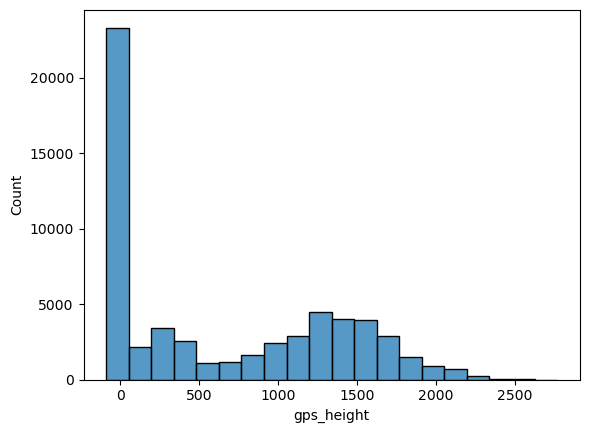

In [871]:
# water_data["gps_height"].value_counts()
sns.histplot(x = "gps_height", data = water_data, bins = 20);

##### This column is important in understanding the altitudes of our water wells and its relation tour our analysis. We will keep it for use in our EDA.

## longitude/ latitude
##### This column typically represents the geographical coordinates of water wells or water points, recorded using GPS (Global Positioning System) technology. These coordinates provide the specific geographic location of the water points on the Earth's surface.We are going to use it in our exploratory analysis but not in our modeling so we keep it for now

## num_private - Number of private water wells
##### This column in water-related datasets often represents the number of privately owned water points or the number of privately owned water sources associated with a particular water point.

In [872]:
column_checking(["num_private"])

Feature Name: num_private
Number of Unique Values: 65
Unique Values: [   0   39    5   45    6    3  698   32   15    7   25  102    1   93
   14   34  120   17  213   47    8   41   80  141   20   35  131    4
   22   11   87   61   65  136    2  180   38   62    9   16   23   42
   24   12  668  672   58  150  280  160   50 1776   30   27   10   94
   26  450  240  755   60  111  300   55 1402]
Missing Values: 0




##### It purely contains  numbers stating  the number of wells owned privately in the region. This column might lack explicit information, making its interpretation challenging so we drop it.


In [873]:
water_data = water_data.drop("num_private", axis = 1)

## wpt_name - Name of the waterpoint if there is one

#####  It contains textual information that identifies or labels individual water points, wells, or water sources, if such names exist.


In [874]:
column_checking(["wpt_name"])

Feature Name: wpt_name
Number of Unique Values: 37400
Unique Values: ['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
Missing Values: 2




##### The column has 37400 records of unique water names in Tanzania. This column is helps us know the number of wells under study and their names but not useful in our analysis so we drop it

In [875]:
water_data = water_data.drop("wpt_name", axis= 1)

## Public_meeting
##### The "public_meeting" column in water-related datasets typically represents whether there was a public meeting held to discuss water issues or water-related projects in the area associated with a particular water point.

In [876]:
water_data["public_meeting"].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

##### We are going to keep this column for our analysis. It helps us further understand our analysis

## recorded_by
##### Represents the entity or group responsible for entering or recording the data for each row in the dataset. This column often contains information about the organization, individual, or group that performed the data entry or data collection process.



In [877]:
water_data["recorded_by"].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

##### This dataset was collected by the GeoData Consultants Ltd. Since we already know the group responsible for this data we can drop it since we wouldn't need it in our analysis

In [878]:
water_data = water_data.drop("recorded_by", axis= 1)

## permit
##### What this column indicates is whether a water point or water source has the necessary legal or official permit or authorization to operate.

In [879]:
water_data["permit"].value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

##### It is important column since it helps in our analysis of predicting whether a pump is functional, non-functional or functional but needs repair

## date_recorded, construction_year, id

##### This two columns are not important or needed for our analysis so we drop them

In [880]:
water_data = water_data.drop(["date_recorded", "construction_year"], axis= 1)

#### Resetting our index so it can be on the same axis with other columns and dropping it since we don't need it in our analysis

In [894]:
#reseting the index and dropping it
water_data = water_data.reset_index(drop=True) 
water_data

,status_group,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,population,...,extraction_type_group,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type
0,functional,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,...,gravity,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe
1,functional,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,...,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,functional,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,...,gravity,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,non functional,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,...,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,functional,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,...,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,functional,10.0,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,Hai,125,...,gravity,gravity,water board,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
59396,functional,4700.0,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,Njombe,56,...,gravity,gravity,vwc,user-group,annually,soft,enough,river,surface,communal standpipe
59397,functional,0.0,0,NaN,34.017087,-8.750434,Rufiji,Mbeya,Mbarali,0,...,swn 80,handpump,vwc,user-group,monthly,fluoride,enough,machine dbh,groundwater,hand pump
59398,functional,0.0,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,Chamwino,0,...,nira/tanira,handpump,vwc,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump


# 3. Exploratory Data Analysis (EDA)
#### dataset contains columns that almost have the same values. We are going to do exploratory analysis to further understand the behaviour of this data set. This analysis not only about determining which columns to drop but also get a deeper understanding of these coluns.

#### Knowing the  columns we are working with.

### 3.1 Status_group 

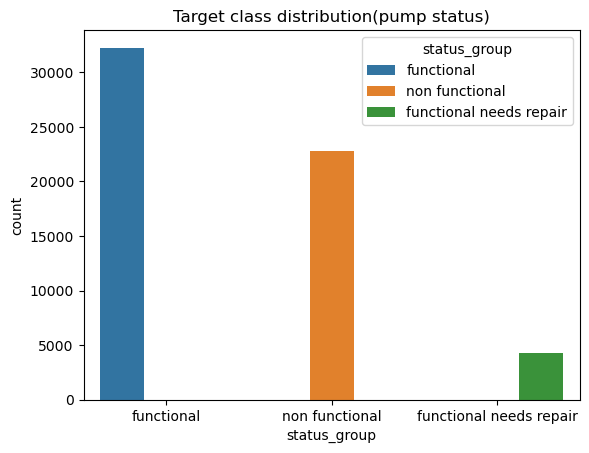

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


In [882]:
## Status group distribution
sns.countplot(x = "status_group", data= water_data, hue= "status_group")
plt.title("Target class distribution(pump status)")
plt.show();
print(water_data["status_group"].value_counts())


#### we have three target groups functional, non functional and functional that needs repair. The functional group is the largest group with 32259 pumps working and the latter is the least with 4317pumps that need repair. The pumps that are non functional stand at 22824 pumps

### 3.2 amount_tsh - Total static head (amount water available to waterpoint)

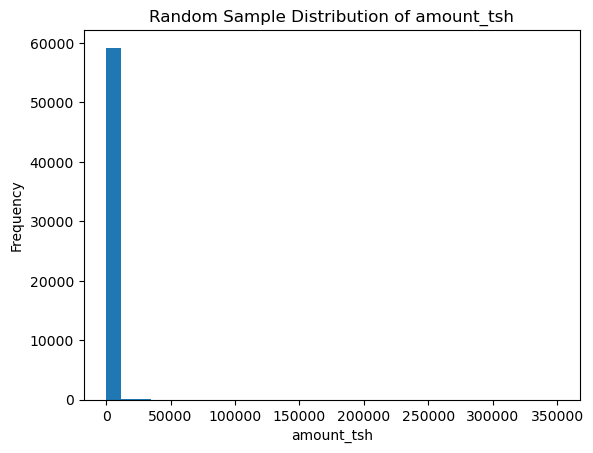

In [883]:
plt.hist(water_data["amount_tsh"], bins=30)
plt.xlabel("amount_tsh")
plt.ylabel('Frequency')
plt.title(f"Random Sample Distribution of {water_data.columns[1]}")
plt.show();


In [884]:
water_data["amount_tsh"].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

#### The amount of zero values here is 70% our data. This does not make sense since water available at a waterpoint is rarely zero in a real world situation. This column can mislead us in our analysis so we are going to drop it.

### 3.3 gps_height - Altitude of the well
#### This measurement indicates how high or low the well is situated above or below the sea level.



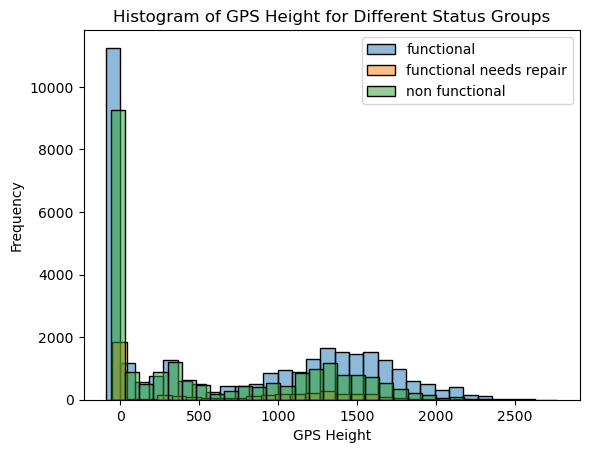

In [885]:
# Group the data by "status_group"
grouped = water_data.groupby("status_group")

# Create subplots for each group
fig, ax = plt.subplots()

# Plot separate histograms for each group
for name, group in grouped:
    sns.histplot(group["gps_height"], bins=30, alpha=0.5, label=name)

# Customize the plot
ax.set_xlabel("GPS Height")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of GPS Height for Different Status Groups")
ax.legend()

# Show the plot
plt.show()


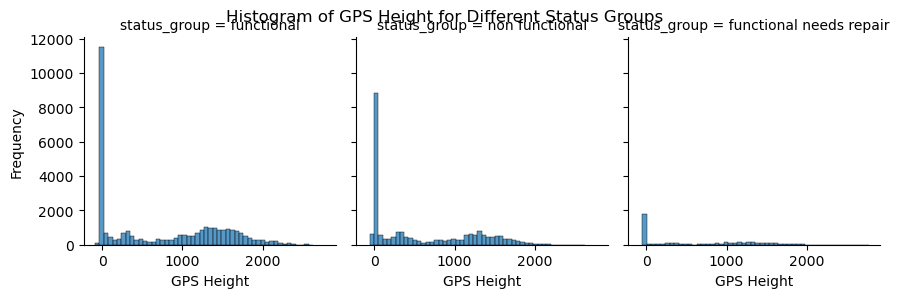

In [886]:
# Create a FacetGrid using seaborn
g = sns.FacetGrid(water_data, col="status_group", col_wrap=3)
g.map(sns.histplot, "gps_height", bins=50)

# Set titles and labels
g.set_axis_labels("GPS Height", "Frequency")
g.fig.suptitle("Histogram of GPS Height for Different Status Groups")
plt.show()


In [887]:
water_data["gps_height"].max()

2770

Most wells in Tanzania wells are at an altitude  of 0 - 2700 metres above sea-level. Many wells and functional pumps are located within the high altitude areas. Wells located at altitudes of almost 1000metres above sea level have non-funcional pumps and those pumps located at wells almost 0 metres to 300 metres above sea level require repair.

array([[<Axes: title={'center': 'amount_tsh'}>,
        <Axes: title={'center': 'gps_height'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'population'}>, <Axes: >]], dtype=object)

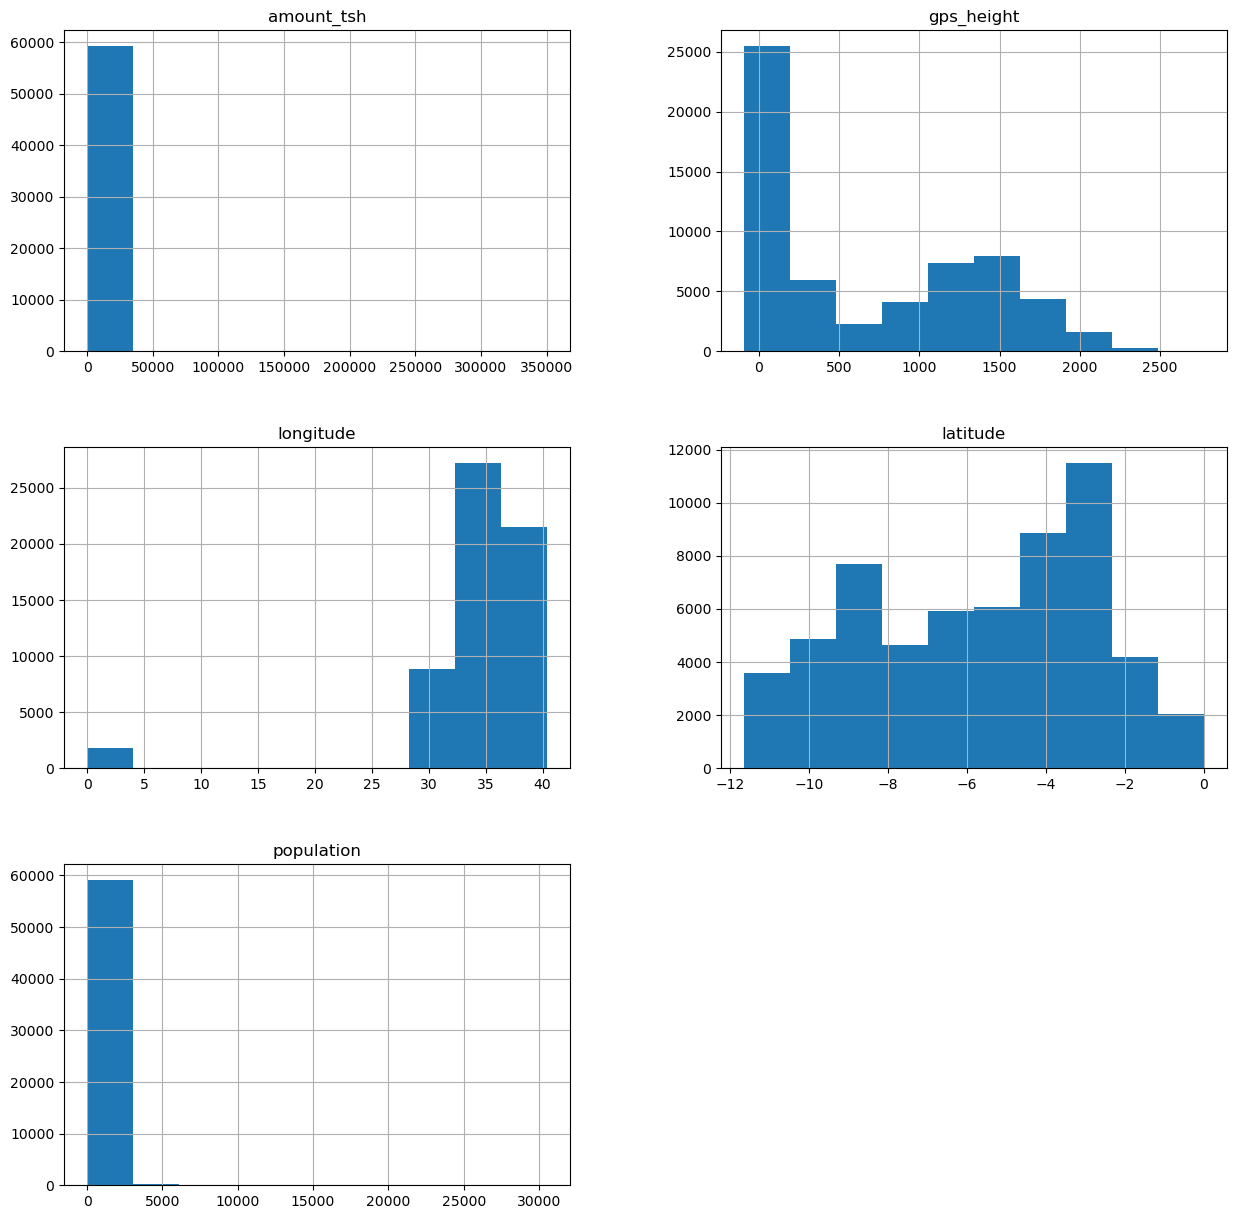

In [888]:
water_data.hist(figsize=(15,15))